In [500]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly 
import plotly.express as px
from matplotlib import pyplot as plt
from finta import TA
import hvplot.pandas
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


In [501]:
btfd_ticker = ['OLLI']
spy_baseline = ['SPY']

In [502]:
df_btfd = yf.download(btfd_ticker,period='5y')
df_btfd = df_btfd.drop(labels='Adj Close', axis=1)
df_btfd.columns

df_baseline = yf.download(spy_baseline,period='5y')
df_baseline = df_baseline.drop(labels='Adj Close', axis=1)
df_baseline.columns
df_baseline

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2017-03-13,237.619995,237.860001,237.240005,237.809998,57256800
2017-03-14,237.179993,237.240005,236.190002,236.899994,59880800
2017-03-15,237.559998,239.440002,237.289993,238.949997,96081800
2017-03-16,239.110001,239.199997,238.100006,238.479996,78344000
2017-03-17,237.750000,237.970001,237.029999,237.029999,89002100
...,...,...,...,...,...
2022-03-07,431.549988,432.299988,419.359985,419.429993,137896600
2022-03-08,419.619995,427.209991,415.119995,416.250000,164772700
2022-03-09,425.140015,429.510010,422.820007,427.410004,116990800


In [503]:
columns_btfd= ["open", "high", "low", "close", "volume"]
df_btfd.columns = columns_btfd
df_btfd

,open,high,low,close,volume
Date,,,,,
2017-03-13,31.200001,31.700001,31.000000,31.500000,253700
2017-03-14,31.250000,31.750000,31.177999,31.549999,178800
2017-03-15,31.650000,31.924999,31.250000,31.750000,334500
2017-03-16,31.799999,32.450001,31.650000,32.250000,404300
2017-03-17,32.250000,32.650002,31.950001,32.500000,798000
...,...,...,...,...,...
2022-03-07,44.750000,44.750000,42.450001,42.509998,1522500
2022-03-08,42.660000,46.299999,41.915001,44.529999,1486900
2022-03-09,45.270000,45.759998,43.770000,44.419998,1043700


In [504]:
columns_baseline= ["open", "high", "low", "close", "volume"]
df_baseline.columns = columns_baseline
df_baseline = df_baseline.drop(columns=["open", "high", "low", "volume"])
df_baseline

,close
Date,
2017-03-13,237.809998
2017-03-14,236.899994
2017-03-15,238.949997
2017-03-16,238.479996
2017-03-17,237.029999
...,...
2022-03-07,419.429993
2022-03-08,416.250000
2022-03-09,427.410004


In [505]:
ema_21 = TA.EMA(df_btfd, 21) 
ema_50 = TA.EMA(df_btfd, 50)
ema_200 = TA.EMA(df_btfd, 200)
df_price_close = df_btfd['close']
ema_df = pd.concat([ema_21, ema_50,ema_200,df_price_close, df_baseline], axis="columns", join="inner")

#Rename Columns
columns_ema= ["21EMA", "50EMA", "200EMA", "close","spy_close"]
ema_df.columns = columns_ema
ema_df.head()
ema_df



,21EMA,50EMA,200EMA,close,spy_close
Date,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999
...,...,...,...,...,...
2022-03-07,43.934066,46.920267,62.661321,42.509998,419.429993
2022-03-08,43.988241,46.826531,62.480909,44.529999,416.250000
2022-03-09,44.027492,46.732158,62.301198,44.419998,427.410004


(<Figure size 1152x648 with 1 Axes>,
 <AxesSubplot:title={'center':'OLLI: Share Price vs. EMA'}, ylabel='OLLI Share Price in $'>)

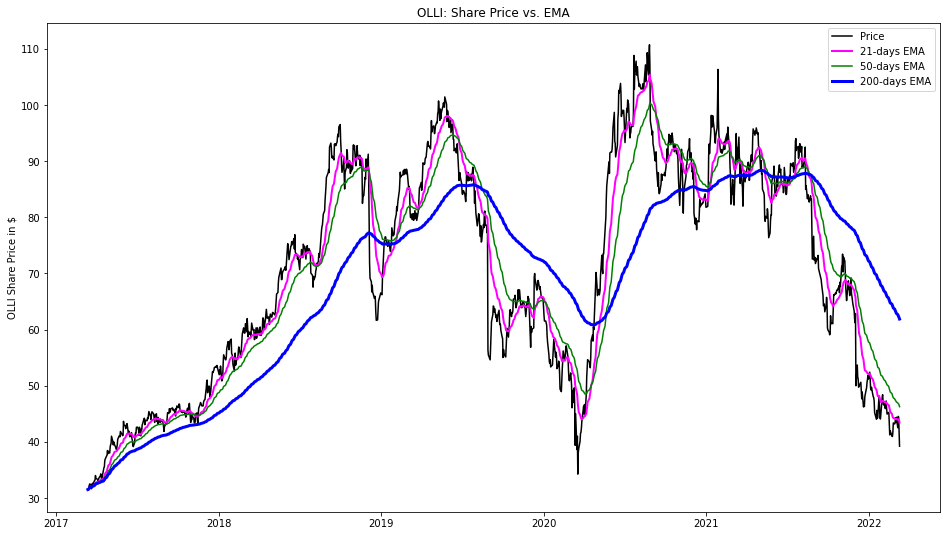

In [506]:
plotted = fig, ax = plt.subplots(figsize=(16,9))

ax.plot(ema_df['close'], label='Price', color='black',linewidth=1.5)
ax.plot(ema_df['21EMA'], label = '21-days EMA', color='magenta',linewidth=2)
ax.plot(ema_df['50EMA'], label = '50-days EMA', color='green')
ax.plot(ema_df['200EMA'], label = '200-days EMA',color='blue',linewidth=3)


ax.legend(loc='best')
ax.title.set_text('OLLI: Share Price vs. EMA')
ax.set_ylabel('OLLI Share Price in $')
plotted 
# ax.xaxis.set_major_formatter(my_year_month_fmt)

In [507]:
ema_df['%_away_21'] = ((ema_df['close']- ema_df['21EMA'])/((ema_df['close']+ema_df['21EMA'])/2))*100
ema_df['%_away_50'] = ((ema_df['close']- ema_df['50EMA'])/((ema_df['close']+ema_df['50EMA'])/2))*100
ema_df['%_away_200'] = ((ema_df['close']- ema_df['200EMA'])/((ema_df['close']+ema_df['200EMA'])/2))*100

In [508]:
# #Find the standard deviation of the 21EMA
# ema_21std = ema_df['21EMA'].std()


# #Add columns
# ema_df['21std-1.5dev'] = ema_df['21EMA']-(1.5*ema_21std)
# ema_df['21std+1.5dev'] = ema_df['21EMA']+(1.5*ema_21std)
# ema_df

In [509]:
# plotted_ticker = fig, ax = plt.subplots(figsize=(16,9))

# ax.plot(ema_df['close'], label='Price', color='black',linewidth=1.5)
# ax.plot(ema_df['21EMA'], label = '21-days EMA', color='magenta',linewidth=2)
# ax.plot(ema_df['21std-1.5dev'], label = '21std-1.5dev', color='green')
# ax.plot(ema_df['21std+1.5dev'], label = '21std+1.5dev',color='green')


# ax.legend(loc='best')
# ax.title.set_text('OLLI: Share Price vs. 1.5σ (~87%)')
# ax.set_ylabel('OLLI Share Price in $')
# plotted_ticker

In [510]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

MA_moves = ema_df.drop(columns=["21EMA","50EMA","200EMA","close","spy_close"])
MA_moves



,%_away_21,%_away_50,%_away_200
Date,,,
2017-03-13,0.000000,0.000000,0.000000
2017-03-14,0.075493,0.077683,0.078873
2017-03-15,0.448228,0.462972,0.470921
2017-03-16,1.429920,1.484312,1.513482
2017-03-17,1.669563,1.764043,1.815073
...,...,...,...
2022-03-07,-3.294772,-9.863035,-38.320947
2022-03-08,1.224058,-5.027627,-33.549683
2022-03-09,0.887546,-5.073186,-33.510119


In [577]:
ticker_max = MA_moves['%_away_21'].max(axis=0) 
print(f'The max % away from the 21 EMA is {ticker_max:.2f}')
ticker_min = MA_moves['%_away_21'].min(axis=0) 
print(f'The max % away from the 21 EMA is {ticker_min:.2f}')

The max % away from the 21 EMA is 21.58
The max % away from the 21 EMA is -31.73


In [576]:
ticker_21_range = MA_moves[['%_away_21']].hvplot(
    line_color="black",
    line_width=2,
    width=1000,
    height=400
)
ticker_21_range 

:Curve   [Date]   (%_away_21)

In [561]:
# Fit the StandardScaler
scaler.fit(MA_moves)

# Scale the data
scaled_data = scaler.transform(MA_moves)

# # Create a DataFrame with the scaled data
MA_scaled = pd.DataFrame(scaled_data)
MA_scaled.index = ema_df.index

#Rename Columns
columns_MA= ["scaled_21EMA", "scaled_50EMA", "scaled_200EMA"]

#This changes all values between 0-1
MA_scaled.columns = columns_MA

scaled_21ema_std = MA_scaled['scaled_21EMA'].std()
print(f'The standard deviation of the scaled distance from the 21ema is {scaled_21ema_std:.2f}, while the 1.5 std.dev is {1.5 * scaled_21ema_std:.2f}')

scaled_50ema_std = MA_scaled['scaled_50EMA'].std()
print(f'The standard deviation of the scaled distance from the 50ema is {scaled_50ema_std:.2f}, while the 1.5 std.dev is {1.5 * scaled_50ema_std:.2f}')

scaled_200ema_std = MA_scaled['scaled_200EMA'].std()
print(f'The standard deviation of the scaled distance from the 200ema is {scaled_200ema_std:.2f}, while the 1.5 std.dev is {1.5 * scaled_200ema_std:.2f}')


The standard deviation of the scaled distance from the 21ema is 0.12, while the 1.5 std.dev is 0.18
The standard deviation of the scaled distance from the 50ema is 0.14, while the 1.5 std.dev is 0.21
The standard deviation of the scaled distance from the 200ema is 0.19, while the 1.5 std.dev is 0.28


In [562]:
ticker_scaled_max = MA_scaled['scaled_21EMA'].max(axis=0) 
print(f'The max % away from the 21 EMA is {ticker_scaled_max}')
ticker_scaled_min = MA_scaled['scaled_21EMA'].min(axis=0) 
print(f'The max % away from the 21 EMA is {ticker_scaled_min}')

The max % away from the 21 EMA is 1.0
The max % away from the 21 EMA is 0.0


In [546]:
columns=['scaled_21EMA', 'scaled_50EMA', 'scaled_200EMA']
MA_scaled.hvplot.kde(y=columns, alpha=0.5, value_label='Rate', legend='top_right')

:NdOverlay   [Variable]
   :Distribution   [Rate]   (Density)

In [549]:
columns=['scaled_21EMA', 'scaled_50EMA', 'scaled_200EMA']
MA_scaled.hvplot.hist(y=columns)

:NdOverlay   [Element]
   :Histogram   [scaled_200EMA]   (scaled_200EMA_count)

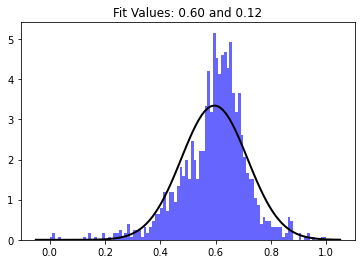

In [567]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
  
# Generate some data for this 
# demonstration.
data = MA_scaled["scaled_21EMA"]
data 
  
# Fit a normal distribution to the data:
# mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=100, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

In [513]:
ema_df_final = pd.concat([ema_df, MA_scaled], axis="columns", join="inner")
ema_df_final['signal_21']=0
ema_df_final['signal_50']=0
ema_df_final['signal_200']=0
ema_df_final

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200
Date,,,,,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,0.595197,0.564663,0.597417,0,0,0
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,0.596613,0.565739,0.598196,0,0,0
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,0.603606,0.571071,0.602069,0,0,0
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,0.622023,0.585208,0.612367,0,0,0
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,0.626519,0.589079,0.615346,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,43.934066,46.920267,62.661321,42.509998,419.429993,-3.294772,-9.863035,-38.320947,0.533384,0.428150,0.218877,0,0,0
2022-03-08,43.988241,46.826531,62.480909,44.529999,416.250000,1.224058,-5.027627,-33.549683,0.618161,0.495077,0.266008,0,0,0
2022-03-09,44.027492,46.732158,62.301198,44.419998,427.410004,0.887546,-5.073186,-33.510119,0.611848,0.494446,0.266399,0,0,0


In [514]:
#Find the price 20 days after the potential signals' daily close price
ema_df_final['close+20']= ema_df_final['close'].shift(-20)
ema_df_final['spy_close+20']= ema_df_final['spy_close'].shift(-20)
ema_df_signal = ema_df_final.copy()
ema_df_signal

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20
Date,,,,,,,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,0.595197,0.564663,0.597417,0,0,0,33.950001,235.339996
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,0.596613,0.565739,0.598196,0,0,0,34.299999,235.059998
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,0.603606,0.571071,0.602069,0,0,0,33.700001,234.029999
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,0.622023,0.585208,0.612367,0,0,0,33.299999,232.509995
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,0.626519,0.589079,0.615346,0,0,0,34.900002,234.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,43.934066,46.920267,62.661321,42.509998,419.429993,-3.294772,-9.863035,-38.320947,0.533384,0.428150,0.218877,0,0,0,NaN,NaN
2022-03-08,43.988241,46.826531,62.480909,44.529999,416.250000,1.224058,-5.027627,-33.549683,0.618161,0.495077,0.266008,0,0,0,NaN,NaN
2022-03-09,44.027492,46.732158,62.301198,44.419998,427.410004,0.887546,-5.073186,-33.510119,0.611848,0.494446,0.266399,0,0,0,NaN,NaN


In [515]:
ema_df_final = ema_df_final.dropna()
ema_df_final

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20
Date,,,,,,,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,0.595197,0.564663,0.597417,0,0,0,33.950001,235.339996
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,0.596613,0.565739,0.598196,0,0,0,34.299999,235.059998
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,0.603606,0.571071,0.602069,0,0,0,33.700001,234.029999
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,0.622023,0.585208,0.612367,0,0,0,33.299999,232.509995
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,0.626519,0.589079,0.615346,0,0,0,34.900002,234.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-04,47.186373,51.050197,66.859811,46.889999,448.700012,-0.630070,-8.495384,-35.111815,0.583376,0.447080,0.250577,0,0,0,42.509998,419.429993
2022-02-07,47.071248,50.849013,66.651453,45.919998,447.260010,-2.476039,-10.187176,-36.832527,0.548744,0.423664,0.233580,0,0,0,44.529999,416.250000
2022-02-08,46.996589,50.668659,66.448453,46.250000,450.940002,-1.601322,-9.118284,-35.845129,0.565155,0.438458,0.243334,0,0,0,44.419998,427.410004


In [516]:
# Generate the trading signal 1 or 0,

percentile_21 = 1.2*scaled_21ema_std
percentile_50 = 1.2*scaled_50ema_std
percentile_200 = 0.9*scaled_200ema_std

In [517]:
#Find out when you are getting the signals across the board in the 21, 50, 200 emas....

ema_df_signal["signal_21"]= np.where(
    ema_df_signal["scaled_21EMA"] < percentile_21, 1.0, 0.0
)

ema_df_signal["signal_50"]= np.where(
    ema_df_signal["scaled_50EMA"] < percentile_50, 1.0, 0.0
)

ema_df_signal["signal_200"]= np.where(
    ema_df_signal["scaled_200EMA"] < percentile_200, 1.0, 0.0
)

# ema_df_signal =ema_df_signal.dropna()
ema_df_signal


,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20
Date,,,,,,,,,,,,,,,,
2017-03-13,31.500000,31.500000,31.500000,31.500000,237.809998,0.000000,0.000000,0.000000,0.595197,0.564663,0.597417,0.0,0.0,0.0,33.950001,235.339996
2017-03-14,31.526190,31.525500,31.525125,31.549999,236.899994,0.075493,0.077683,0.078873,0.596613,0.565739,0.598196,0.0,0.0,0.0,34.299999,235.059998
2017-03-15,31.608006,31.603346,31.600834,31.750000,238.949997,0.448228,0.462972,0.470921,0.603606,0.571071,0.602069,0.0,0.0,0.0,33.700001,234.029999
2017-03-16,31.792124,31.774836,31.765568,32.250000,238.479996,1.429920,1.484312,1.513482,0.622023,0.585208,0.612367,0.0,0.0,0.0,33.299999,232.509995
2017-03-17,31.961884,31.931699,31.915407,32.500000,237.029999,1.669563,1.764043,1.815073,0.626519,0.589079,0.615346,0.0,0.0,0.0,34.900002,234.570007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-07,43.934066,46.920267,62.661321,42.509998,419.429993,-3.294772,-9.863035,-38.320947,0.533384,0.428150,0.218877,0.0,0.0,0.0,NaN,NaN
2022-03-08,43.988241,46.826531,62.480909,44.529999,416.250000,1.224058,-5.027627,-33.549683,0.618161,0.495077,0.266008,0.0,0.0,0.0,NaN,NaN
2022-03-09,44.027492,46.732158,62.301198,44.419998,427.410004,0.887546,-5.073186,-33.510119,0.611848,0.494446,0.266399,0.0,0.0,0.0,NaN,NaN


In [518]:
# #Backtest the last time you got these signals compared to where 
# #Drop 20 most recent days
# days_recency=20
# ema_df_final_recency = ema_df_signal.iloc[:-days_recency, :]
# ema_df_final_recency

In [519]:
#Calculate when we get our signal
ema_df_21signal = ema_df_signal.loc[(ema_df_signal['signal_21']==1.0),:]
# ema_df_21signal_bt = ema_df_final.loc[(ema_df_final['signal_21']==1.0),:]
ema_df_21signal_bt =ema_df_21signal.dropna()

ema_df_50signal = ema_df_signal.loc[(ema_df_signal['signal_50']==1.0),:]
# ema_df_50signal_bt = ema_df_final.loc[(ema_df_final['signal_50']==1.0),:]
ema_df_50signal_bt = ema_df_50signal.dropna()

ema_df_200signal = ema_df_signal.loc[(ema_df_signal['signal_200']==1.0),:]
# ema_df_200signal_bt = ema_df_final.loc[(ema_df_final['signal_200']==1.0),:]
ema_df_200signal_bt = ema_df_200signal.dropna()
ema_df_21signal_bt 


,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20
Date,,,,,,,,,,,,,,,,
2019-08-29,77.611577,82.153317,84.176389,56.360001,292.579987,-31.725500,-37.243085,-39.586030,0.000000,0.049187,0.206380,1.0,1.0,0.0,59.860001,295.399994
2019-08-30,75.596888,81.106128,83.889990,55.450001,292.450012,-30.747601,-37.575944,-40.821001,0.018346,0.044580,0.194181,1.0,1.0,0.0,58.639999,296.769989
2019-09-03,73.688080,80.066672,83.597978,54.599998,290.739990,-29.758153,-37.821791,-41.965853,0.036909,0.041177,0.182872,1.0,1.0,0.0,58.400002,293.239990
2020-03-18,46.737442,51.803558,63.942873,34.250000,240.000000,-30.837971,-40.796822,-60.478672,0.016651,0.000000,0.000000,1.0,1.0,1.0,55.029999,279.100006
2021-12-03,64.343020,67.087993,76.942762,49.990002,453.420013,-25.107389,-29.207865,-42.467775,0.124161,0.160401,0.177914,1.0,1.0,0.0,52.410000,477.709991


## Whats the average % difference when we get this 21EMA signal to the price 4 weeks after?

In [520]:
#Calculate for the 21EMA
ema_df_21signal_bt['20day_%_diff']= ((ema_df_21signal_bt['close+20']- ema_df_21signal_bt['close'])/((ema_df_21signal_bt['close+20']+ema_df_21signal_bt['close'])/2))*100
mean1 = ema_df_21signal_bt['20day_%_diff'].mean()
print(f'The average % difference of our ticker 20 trading days after our 21EMA signal is {mean1}')

ema_df_21signal_bt['spy_20day_%_diff']= ((ema_df_21signal_bt['spy_close+20']- ema_df_21signal_bt['spy_close'])/((ema_df_21signal_bt['spy_close+20']+ema_df_21signal_bt['spy_close'])/2))*100
mean4 = ema_df_21signal_bt['spy_20day_%_diff'].mean()
print(f'The average % difference in the SPY 20 trading days after our 21EMA signal is {mean4}')


# Calculate for the 50EMA

ema_df_50signal_bt['20day_%_diff']= ((ema_df_50signal_bt['close+20']- ema_df_50signal_bt['close'])/((ema_df_50signal_bt['close+20']+ema_df_50signal_bt['close'])/2))*100
mean2 = ema_df_50signal_bt['20day_%_diff'].mean()
print(f'The average % difference 20 trading days after our 50EMA signal is {mean2:.2f}')

ema_df_50signal_bt['spy_20day_%_diff']= ((ema_df_50signal_bt['spy_close+20']- ema_df_50signal_bt['spy_close'])/((ema_df_50signal_bt['spy_close+20']+ema_df_50signal_bt['spy_close'])/2))*100
mean5 = ema_df_50signal_bt['spy_20day_%_diff'].mean()
print(f'The average % difference in the SPY 20 trading days after our 50EMA signal is {mean5:.2f}')

#Calculate for the 200EMA

ema_df_200signal_bt['20day_%_diff']= ((ema_df_200signal_bt['close+20']- ema_df_200signal_bt['close'])/((ema_df_200signal_bt['close+20']+ema_df_200signal_bt['close'])/2))*100
mean3 = ema_df_200signal_bt['20day_%_diff'].mean()
print(f'The average % difference 20 trading days after our 200EMA signal is {mean3:.2f}')

ema_df_200signal_bt['spy_20day_%_diff']= ((ema_df_200signal_bt['spy_close+20']- ema_df_200signal_bt['spy_close'])/((ema_df_200signal_bt['spy_close+20']+ema_df_200signal_bt['spy_close'])/2))*100
mean6 = ema_df_200signal_bt['spy_20day_%_diff'].mean()
print(f'The average % difference in the SPY 20 trading days after our 50EMA signal is {mean6:.2f}')


The average % difference of our ticker 20 trading days after our 21EMA signal is 13.923507750386658
The average % difference in the SPY 20 trading days after our 21EMA signal is 4.712719762462619
The average % difference 20 trading days after our 50EMA signal is 19.199730449140244
The average % difference in the SPY 20 trading days after our 50EMA signal is 7.469720576642288
The average % difference 20 trading days after our 200EMA signal is 16.44410726308384
The average % difference in the SPY 20 trading days after our 50EMA signal is 6.749350890061021


In [521]:
#Find

# # ticker_plot = ema_df_final[['20day_%_diff']].hvplot(
# #     color='blue',
# #     line_width=2,
# #     width=1000,
# #     height=400
# # )

# ticker_returns = ema_df[["%_away_21"]].hvplot(
#     color='black',
#     line_width=2,
#     width=1000,
#     height=400
# )

# ticker_returns_dummy = ema_df[["%_away_50"]].hvplot(
#     color='blue',
#     line_width=2,
#     width=1000,
#     height=400
# )



# ticker_vs_lagged_return = ticker_returns * ticker_returns_dummy
# ticker_vs_lagged_return 

In [522]:
ema_df_21signal_bt.head()

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20,20day_%_diff,spy_20day_%_diff
Date,,,,,,,,,,,,,,,,,,
2019-08-29,77.611577,82.153317,84.176389,56.360001,292.579987,-31.725500,-37.243085,-39.586030,0.000000,0.049187,0.206380,1.0,1.0,0.0,59.860001,295.399994,6.023060,0.959219
2019-08-30,75.596888,81.106128,83.889990,55.450001,292.450012,-30.747601,-37.575944,-40.821001,0.018346,0.044580,0.194181,1.0,1.0,0.0,58.639999,296.769989,5.592074,1.466337
2019-09-03,73.688080,80.066672,83.597978,54.599998,290.739990,-29.758153,-37.821791,-41.965853,0.036909,0.041177,0.182872,1.0,1.0,0.0,58.400002,293.239990,6.725669,0.856194
2020-03-18,46.737442,51.803558,63.942873,34.250000,240.000000,-30.837971,-40.796822,-60.478672,0.016651,0.000000,0.000000,1.0,1.0,1.0,55.029999,279.100006,46.550177,15.064537
2021-12-03,64.343020,67.087993,76.942762,49.990002,453.420013,-25.107389,-29.207865,-42.467775,0.124161,0.160401,0.177914,1.0,1.0,0.0,52.410000,477.709991,4.726559,5.217312


In [523]:
# Visualize entry position of the signals


price_plot = ema_df_final[["close"]].hvplot(
    color='black',
    line_width=2,
    title = "21 EMA Extreme Move Signal vs. EMAs / Close Price",
    width=1000,
    height=400
)

signal_21 = ema_df_21signal_bt[ema_df_21signal_bt["signal_21"] == 1.0]["close"].hvplot.scatter(
    color="magenta",
    marker="^",
    size=300,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)


ema_21_plot = ema_df_final[["21EMA"]].hvplot(
    color='magenta',
    line_width=2,
    width=1000,
    height=400
)

signal_50 = ema_df_50signal_bt[ema_df_50signal_bt["signal_50"] == 1.0]["close"].hvplot.scatter(
    color="green",
    marker="x",
    size=500,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)


ema_50_plot = ema_df_final[["50EMA"]].hvplot(
    line_color="green",
    width=1000,
    height=400
)


signal_200 = ema_df_200signal_bt[ema_df_200signal_bt["signal_200"] == 1.0]["close"].hvplot.scatter(
    color="blue",
    marker=">",
    size=200,
    legend=False,
    ylabel="Price in $",
    width=1000,
    height=400
)

ema_200_plot = ema_df_final[["200EMA"]].hvplot(
    line_color="blue",
    line_width=3,
    width=1000,
    height=400
)

ema_signals_plot = price_plot * signal_21 * ema_21_plot * signal_50 * ema_50_plot * signal_200 * ema_200_plot
ema_signals_plot



:Overlay
   .Curve.I           :Curve   [Date]   (close)
   .Scatter.Close.I   :Scatter   [Date]   (close)
   .Curve.II          :Curve   [Date]   (21EMA)
   .Scatter.Close.II  :Scatter   [Date]   (close)
   .Curve.III         :Curve   [Date]   (50EMA)
   .Scatter.Close.III :Scatter   [Date]   (close)
   .Curve.IV          :Curve   [Date]   (200EMA)

In [524]:
#Now that we've generated our signals, lets' backtest the difference in returns 
diff_returns = ema_df_signal.filter(['close', 'spy_close'])
diff_returns['ticker_return']= diff_returns['close'].pct_change()
diff_returns['spy_return']= diff_returns['spy_close'].pct_change()
diff_returns['cum_ticker_return'] = diff_returns['ticker_return'].cumsum()
diff_returns['cum_spy_return'] = diff_returns['spy_return'].cumsum()
diff_returns = diff_returns.filter(['cum_ticker_return', 'cum_spy_return'])
diff_returns = diff_returns.dropna()
diff_returns

,cum_ticker_return,cum_spy_return
Date,,
2017-03-14,0.001587,-0.003827
2017-03-15,0.007926,0.004827
2017-03-16,0.023674,0.002860
2017-03-17,0.031426,-0.003220
2017-03-20,0.026811,-0.004317
...,...,...
2022-03-07,0.807311,0.661365
2022-03-08,0.854829,0.653783
2022-03-09,0.852359,0.680594


In [525]:
cum_ticker_return = diff_returns[['cum_ticker_return']].hvplot(
    line_color="black",
    ylabel="Total % Return",
    line_width=3,
    width=1000,
    height=400
)

spy_returns = diff_returns[['cum_spy_return']].hvplot(
    line_color="red",
    line_width=2,
    width=1000,
    height=400
)

# x = ema_df_21signal_bt.index.tolist()
# y = x[1]
# y
# filtered_df = diff_returns.loc[(df['date']

# diff_returns.iloc[[x]1] 

# signal_21_marker = diff_returns.loc[x][1]["close"].hvplot.scatter(
#     color="magenta",
#     marker="^",
#     size=300,
#     legend=False,
#     ylabel="Price in $",
#     width=1000,
#     height=400
# )


cum_returns = cum_ticker_return * spy_returns 
cum_returns

# #Calculate for the 21EMA
# ema_df_21signal_bt['20day_%_diff']= ((ema_df_21signal_bt['close+20']- ema_df_21signal_bt['close'])/((ema_df_21signal_bt['close+20']+ema_df_21signal_bt['close'])/2))*100
# mean1 = ema_df_21signal_bt['20day_%_diff'].mean()
# print(f'The average % difference of our ticker 20 trading days after our 21EMA signal is {mean1}')

# diff_returns = ema_df_final_recency.filter(['close', 'spy_close','close+20','spy_close+20'])
# diff_returns['ticker_20day_return']= ((diff_returns['close+20']- diff_returns['close'])/((diff_returns['close+20']+diff_returns ['close'])/2))*100
# diff_returns['spy_20day_return']= ((diff_returns['spy_close+20']- diff_returns['spy_close'])/((diff_returns['spy_close+20']+diff_returns['spy_close'])/2))*100
# diff_returns = diff_returns.filter(['ticker_20day_return','spy_20day_return'])
# diff_returns['cum_ticker_return'] = diff_returns['ticker_20day_return'].cumsum()
# diff_returns['cum_spy_return'] = diff_returns['spy_20day_return'].cumsum()
# diff_returns

:Overlay
   .Curve.I  :Curve   [Date]   (cum_ticker_return)
   .Curve.II :Curve   [Date]   (cum_spy_return)

In [526]:
ema_df_21signal_bt

,21EMA,50EMA,200EMA,close,spy_close,%_away_21,%_away_50,%_away_200,scaled_21EMA,scaled_50EMA,scaled_200EMA,signal_21,signal_50,signal_200,close+20,spy_close+20,20day_%_diff,spy_20day_%_diff
Date,,,,,,,,,,,,,,,,,,
2019-08-29,77.611577,82.153317,84.176389,56.360001,292.579987,-31.725500,-37.243085,-39.586030,0.000000,0.049187,0.206380,1.0,1.0,0.0,59.860001,295.399994,6.023060,0.959219
2019-08-30,75.596888,81.106128,83.889990,55.450001,292.450012,-30.747601,-37.575944,-40.821001,0.018346,0.044580,0.194181,1.0,1.0,0.0,58.639999,296.769989,5.592074,1.466337
2019-09-03,73.688080,80.066672,83.597978,54.599998,290.739990,-29.758153,-37.821791,-41.965853,0.036909,0.041177,0.182872,1.0,1.0,0.0,58.400002,293.239990,6.725669,0.856194
2020-03-18,46.737442,51.803558,63.942873,34.250000,240.000000,-30.837971,-40.796822,-60.478672,0.016651,0.000000,0.000000,1.0,1.0,1.0,55.029999,279.100006,46.550177,15.064537
2021-12-03,64.343020,67.087993,76.942762,49.990002,453.420013,-25.107389,-29.207865,-42.467775,0.124161,0.160401,0.177914,1.0,1.0,0.0,52.410000,477.709991,4.726559,5.217312


In [533]:
#Plot the difference in performance

table = ema_df_21signal_bt.filter(['20day_%_diff','spy_20day_%_diff'])

table.hvplot.bar(stacked=False,rot = 60,  height=500, legend='top_left', title="%Difference SPY vs. OLLI 20 days after signal", ylabel="%Return 20 days after signal")

#Plot difference in Ticker vs. SPY returns
# ticker_20 = ema_df_21signal_bt[["20day_%_diff"]].hvplot.bar(
#     color='blue',
#     marker=">",
#     size=300,
#     line_width=2,
#     ylabel = "%Return 20 days after receving signal",
#     width=1000,
#     height=400
# )

# spy_20 = ema_df_21signal_bt[["spy_20day_%_diff"]].hvplot.bar(
#     color='red',
#     marker="<",
#     size=300,
#     line_width=2,
#     width=1000,
#     height=400
# )


# returns_plots = ticker_20 * spy_20
# returns_plots 

# spy_return_plot = diff_returns[["cum_spy_return"]].hvplot(
#     color='black',
#     line_width=2,
#     width=1000,
#     height=400
# )


    
# signal_21 = dfnew[dfnew["signal_21"] == 1.0]["Date"].hvplot.scatter(
#     color="magenta",
#     marker="^",
#     size=200,
#     legend=False,
#     ylabel="% Return",
#     width=1000,
#     height=400
# )

# comparison_plot = ticker_return_plot * spy_return_plot * signal_21
# comparison_plot



:Bars   [Date,Variable]   (value)

# Now let's try linear regression

In [528]:

df_lr_target = ema_df_final[["close","%_away_21","%_away_50","%_away_200","close+20"]]
df_lr_target["close_20return"] = ((df_lr_target['close+20']- df_lr_target['close'])/((df_lr_target['close+20']+df_lr_target['close'])/2))*100
df_lr_target.index = df_lr_target["%_away_21"]
df_lr_target

,close,%_away_21,%_away_50,%_away_200,close+20,close_20return
%_away_21,,,,,,
0.000000,31.500000,0.000000,0.000000,0.000000,33.950001,7.486633
0.075493,31.549999,0.075493,0.077683,0.078873,34.299999,8.352316
0.448228,31.750000,0.448228,0.462972,0.470921,33.700001,5.958749
1.429920,32.250000,1.429920,1.484312,1.513482,33.299999,3.203659
1.669563,32.500000,1.669563,1.764043,1.815073,34.900002,7.121666
...,...,...,...,...,...,...
-0.630070,46.889999,-0.630070,-8.495384,-35.111815,42.509998,-9.798660
-2.476039,45.919998,-2.476039,-10.187176,-36.832527,44.529999,-3.073520
-1.601322,46.250000,-1.601322,-9.118284,-35.845129,44.419998,-4.036620


In [529]:
df_lr_target = df_lr_target.drop(columns=["close", "%_away_21", "close+20"])
df_lr_target.head(15)

,%_away_50,%_away_200,close_20return
%_away_21,,,
0.000000,0.000000,0.000000,7.486633
0.075493,0.077683,0.078873,8.352316
0.448228,0.462972,0.470921,5.958749
1.429920,1.484312,1.513482,3.203659
1.669563,1.764043,1.815073,7.121666
0.953837,1.061023,1.120109,9.003699
-1.004505,-0.946519,-0.911063,11.607142
0.595549,0.664780,0.706333,13.062409
1.538967,1.650929,1.714551,12.508993


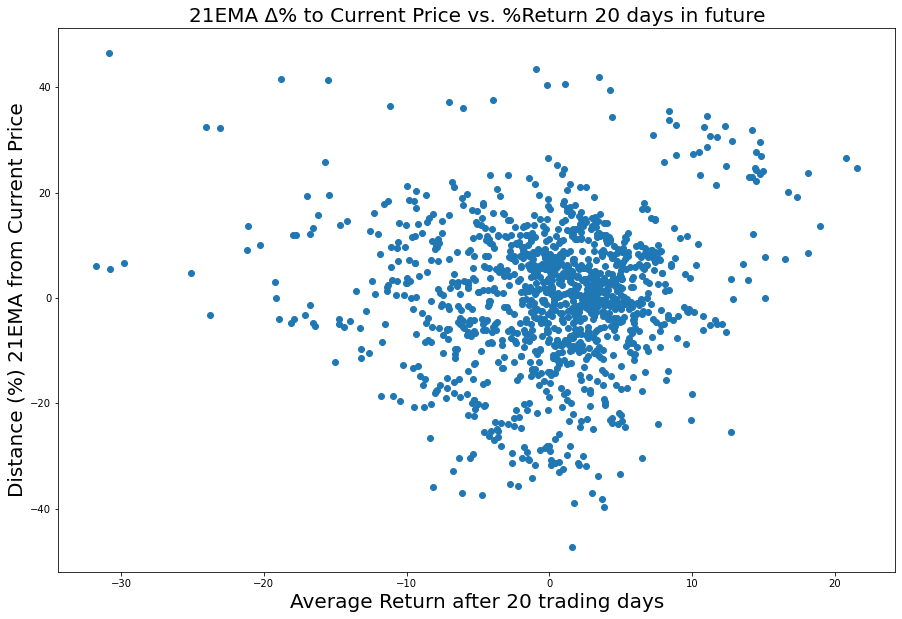

<Figure size 432x288 with 0 Axes>

In [484]:
# # Create a scatter plot of the data
plt.figure(figsize=(15,10))
plt.scatter(df_lr_target.index,df_lr_target.close_20return)
plt.title("21EMA Δ% to Current Price vs. %Return 20 days in future",fontsize=20)
plt.xlabel("Average Return after 20 trading days",fontsize=20)
plt.ylabel("Distance (%) 21EMA from Current Price",fontsize=20)
plt.show()
plt.savefig('pic.png')
#X-axis the return 20 days in the future

In [485]:
# Create a Linear Regression Model using sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
df = df_lr_target

In [486]:
# Separate the data into the X and y components
# In this case, y will be the `%percentile occurence` and X will be the remaining columns
X = df.index.values.reshape(-1,1)
y = df['close_20return']

In [487]:
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [488]:
# # Make predictions using the X data
predicted_y_values = model.predict(X)
predicted_y_values

array([0.43340571, 0.44186959, 0.48365848, ..., 0.25387468, 0.49466762,
       0.18247295])

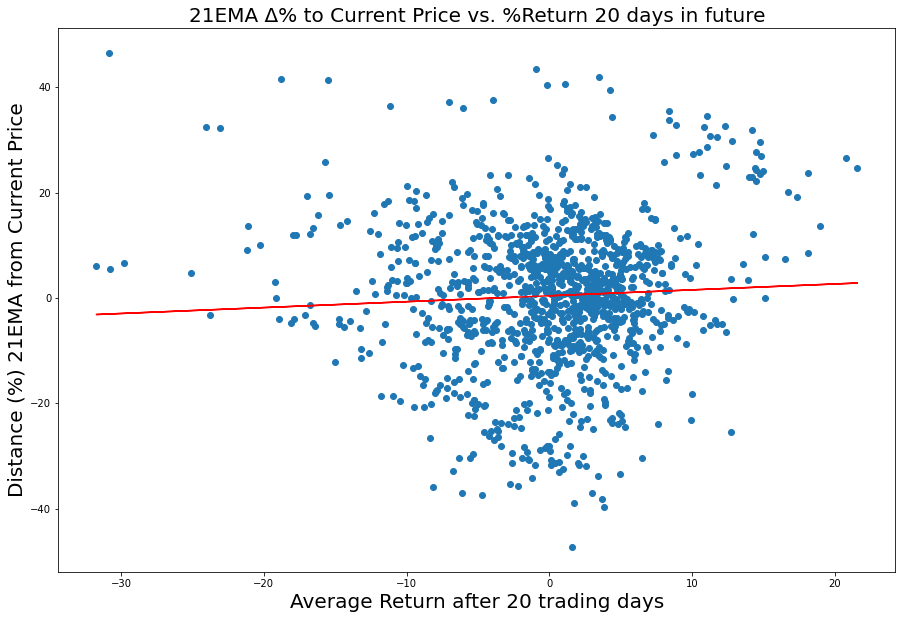

<Figure size 432x288 with 0 Axes>

In [489]:
# Plot X and y as a scatter plot
# Plot X and the predictions as a red line plot
plt.figure(figsize=(15,10))
plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')
plt.title("21EMA Δ% to Current Price vs. %Return 20 days in future",fontsize=20)
plt.xlabel("Average Return after 20 trading days",fontsize=20)
plt.ylabel("Distance (%) 21EMA from Current Price",fontsize=20)
plt.show()
plt.savefig('pic.png')

In [490]:
# # Display the coefficient
model.coef_

array([0.11211428])

In [491]:
# # Display the intercept
model.intercept_


0.43340570595488265

In [492]:
# # R2 value
model.score(X, y, sample_weight=None)

0.002936420303124687